# TITANIC SURVIVAL PREDICTION
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("C:/Users/Imaya Setty S/Downloads/archive (7)/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.duplicated().sum()

0

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
df.drop(columns=['Cabin','Ticket'],inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [24]:
''' # description of the columns what they signify:
*PassengerID- ID's of the passenger in the titanic 
*Survived- (TARGET VARIABLE)says if they survived in the ship(1) or not(0)
*Pclass- the class at which they stayed(higher class which means the better the chances of survival)
* Name- name of the passenger
*Sex- gender of the passenger
* Age- passenger's age (floating point numbers- fractional for infants)
*SibSb- the number of siblings/ spouses the family had aboard the titanic
*Parch- number of parents/ siblings the passenger had aboard 
*Fare- price of the ticket (in british dollars)
*Embarked- port of embarkation(boarding): C = Cherbourg, Q = Queenstown, S = Southampton).'''

" # description of the columns what they signify:\n*PassengerID- ID's of the passenger in the titanic \n*Survived- (TARGET VARIABLE)says if they survived in the ship(1) or not(0)\n*Pclass- the class at which they stayed(higher class which means the better the chances of survival)\n* Name- name of the passenger\n*Sex- gender of the passenger\n* Age- passenger's age (floating point numbers- fractional for infants)\n*SibSb- the number of siblings/ spouses the family had aboard the titanic\n*Parch- number of parents/ siblings the passenger had aboard \n*Fare- price of the ticket (in british dollars)\n*Embarked- port of embarkation(boarding): C = Cherbourg, Q = Queenstown, S = Southampton)."

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Checking null values in Embarked
#df[df.Embarked.isnull()]

# Data cleaning and encoding 

In [28]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [34]:
df.drop(columns=['Name'],inplace=True)

In [36]:
# syntax: df.fillna(df['col_name'].mode()[0]/median()/mean(), inplace=True)

In [38]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True) #[0] picks the 1st mode value incase there are multiple mode values, 
#top modal value 

In [40]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [42]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [44]:
df.shape

(891, 9)

# Encode categorical variables

In [47]:
#here 'sex' and 'embarked' are categorical

In [49]:
from sklearn.preprocessing import LabelEncoder 
#using labelencoder as 'sex' and 'embarked' have some instrinsic order


In [50]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])

In [51]:
print(df.Sex.unique())
print(df.Embarked.unique())

[1 0]
[2 0 1]


In [52]:
df.Sex.nunique() #returns the total number of unique values

2

In [53]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [59]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


<Axes: >

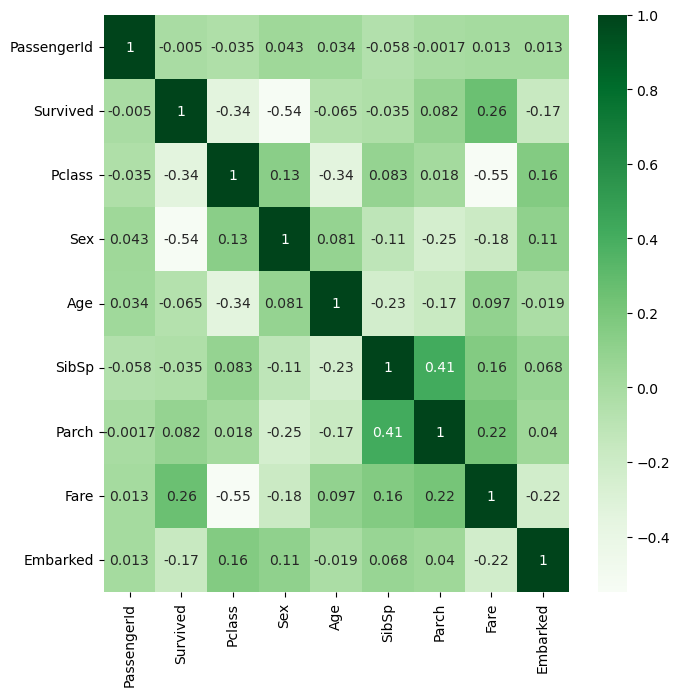

In [61]:
import seaborn as sns
plt.figure(figsize=(7.5,7.5))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [62]:
#sns.pairplot(df)

In [167]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# selecting feature and target variable

In [64]:
X=df.iloc[:,2:] #or give manually if want passenger ID as well

In [68]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [70]:
y=df.iloc[:,1]

In [72]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [74]:
'''now that the data is clean 
will fit the model to predict whether the passenger on the titanic survices or not
* IT IS A CLASSIFICATION MODEL WHOSE RESULT IS GOING TO BE YES OR NO/ SURVIVED OR NOT SURVIVED/ TRUE OR FALSE, in this case 1 or 0
'''

'now that the data is clean \nwill fit the model to predict whether the passenger on the titanic survices or not\n* IT IS A CLASSIFICATION MODEL WHOSE RESULT IS GOING TO BE YES OR NO/ SURVIVED OR NOT SURVIVED/ TRUE OR FALSE, in this case 1 or 0\n'

# splitting the data into training and testing tests


In [77]:
from sklearn.model_selection import train_test_split


In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [81]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2


In [83]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0


In [85]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [87]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# Feature Scaling:

* Standardization (MinMax scaler)
* Normalization(Standard scaler)

In [90]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [144]:
X_train

array([[-1.61413602,  0.7243102 ,  1.25364106, ..., -0.47934164,
        -0.07868358,  0.5635246 ],
       [-0.40055118,  0.7243102 , -0.47728355, ..., -0.47934164,
        -0.37714494,  0.5635246 ],
       [ 0.81303367,  0.7243102 ,  0.21508629, ..., -0.47934164,
        -0.47486697,  0.5635246 ],
       ...,
       [ 0.81303367,  0.7243102 ,  0.90745614, ..., -0.47934164,
        -0.35580399,  0.5635246 ],
       [-1.61413602, -1.38062393, -1.1696534 , ...,  2.04874166,
         1.68320121,  0.5635246 ],
       [-1.61413602,  0.7243102 , -0.63114352, ...,  0.78470001,
         0.86074761,  0.5635246 ]])

In [96]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr=LogisticRegression()

# Fitting of logistic regression model

In [104]:
lr.fit(X_train,y_train)

LogisticRegression()

In [106]:
y_pred=lr.predict(X_test)

# Model's evaluation

In [108]:
from sklearn.metrics import *

In [163]:
print("accuracy=",accuracy_score(y_test,y_pred))

accuracy= 0.8100558659217877


In [112]:
print(classification_report(y_test,y_pred)) #after scaling 

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [114]:
print(confusion_matrix(y_test,y_pred)) #after normalization

[[92 13]
 [21 53]]


In [173]:
con=confusion_matrix(y_test,y_pred)

In [175]:
print(f'Accuracy={np.ceil((con[0][0]+con[1][1])/con.sum()*100)} %\n')
print(f'Error Rate={np.ceil(((con[0][1]+con[1][0])/con.sum())*100)} %\n')
print(f'Precision={np.ceil((con[0][0])/(con[0][0]+con[1][0])*100)} %\n')
print(f'Recall={np.ceil((con[0][0])/(con[0][0]+con[0][1])*100)} %\n')

Accuracy=82.0 %

Error Rate=19.0 %

Precision=82.0 %

Recall=88.0 %



In [116]:
final_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [118]:
final_df.head()

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1


<Axes: >

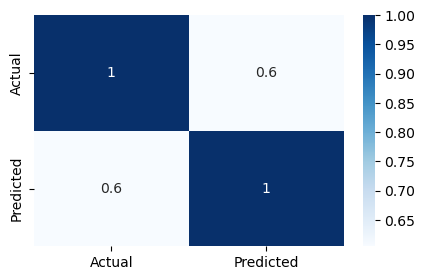

In [120]:
plt.figure(figsize=(5,3)) #5=> height, 3=>width
sns.heatmap(final_df.corr(), annot=True, cmap='Blues')

# Prediction by giving random inputs 

In [123]:
'''If you give X_test to .predict(), you’re evaluating the model.

If you give X_train to .predict(), you’re checking if the model memorized the training data.

If you give custom-made data like new_passenger, you’re testing the model on a fresh scenario — just like predicting for a new Titanic passenger'''

'If you give X_test to .predict(), you’re evaluating the model.\n\nIf you give X_train to .predict(), you’re checking if the model memorized the training data.\n\nIf you give custom-made data like new_passenger, you’re testing the model on a fresh scenario — just like predicting for a new Titanic passenger'

In [125]:
lr.predict([[3,1,28.0,1,1,15.2458,0]]) #it is giving correct output as expected, the passenger has not survived #on x_test dataset

array([0], dtype=int64)

In [132]:
lr.predict([[2,1,31.0,0,0,10.5000,2]]) #on X_test dataset

array([0], dtype=int64)

In [134]:
lr.predict([[3,0,6.0,4,2,31.2750,2]]) #on X_train dataset

array([0], dtype=int64)

In [136]:
df.columns.unique()

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [156]:
 df['Embarked'].unique()

array([2, 0, 1])

In [152]:
# df['Fare'].unique()

In [160]:
lr.predict([[1,1,28,5,4,211,2]]) #on custom data

array([1], dtype=int64)